**Context:** Credit Card Fraud Analysis - Anonymized credit card transactions labeled as fraudulent or genuine.
It is important that credit card firms are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in the past by cardholders. There are around 30 features including time, amount and features (F1 through F28) - these are masked due to confidentiality aspects. This dataset presents transactions that occurred, where we have 492 fraudulent transactions out of 284,807 transactions tagged as is_fraud. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


**Ask:**<br>
a) Fit a logistic regression model and plot ROC curve for model accuracy.<br>
b) It is encouraged to perform EDA, Feature Engineering and provide your comments accordingly.

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

#filter warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Exploratory data analysis

In [2]:
#Read the data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/cc_fraud_analysis.csv')
df.head()

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,Amount,is_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. The time is recorded in the number of seconds since the first transaction in the data set. Therefore, we can conclude that this data set includes all transactions recorded over the course of two days. 
2. The features F1 to F28 look different from other features which are Time and  Amount. May be that the features F1 to F28 was prepared using PCA and if so, the physical interpretation of individual features does not make sense. 
3. The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘is_fraud’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
#Read the shape
df.shape

(284807, 31)

In [4]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      284807 non-null  float64
 1   F1        284807 non-null  float64
 2   F2        284807 non-null  float64
 3   F3        284807 non-null  float64
 4   F4        284807 non-null  float64
 5   F5        284807 non-null  float64
 6   F6        284807 non-null  float64
 7   F7        284807 non-null  float64
 8   F8        284807 non-null  float64
 9   F9        284807 non-null  float64
 10  F10       284807 non-null  float64
 11  F11       284807 non-null  float64
 12  F12       284807 non-null  float64
 13  F13       284807 non-null  float64
 14  F14       284807 non-null  float64
 15  F15       284807 non-null  float64
 16  F16       284807 non-null  float64
 17  F17       284807 non-null  float64
 18  F18       284807 non-null  float64
 19  F19       284807 non-null  float64
 20  F20 

In [5]:
#Check missing values
df.isnull().sum().sum()

0

There are no missing values

In [6]:
#Lets describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
F1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
F2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
F3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
F4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
F5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
F6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
F7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
F8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
F9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


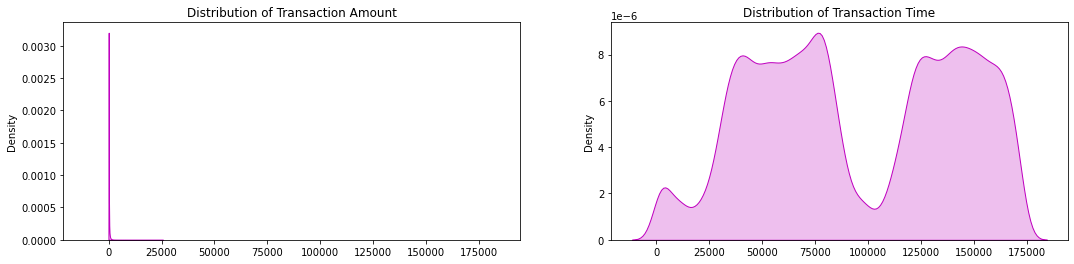

In [7]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

Looking at the distribution of the two named features in the dataset i.e. Time and Amount. For Time, it is clear that there were certain duration in the day when most of the transactions took place.

In [8]:
#Lets look at distribution of Amount variable with respect to Class
df[df.is_fraud == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
df[df.is_fraud == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can clearly notice from the above distribution of Amount variable w.r.t. is_fraud, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with.

Here we will observe the distribution of our classes

In [10]:
classes=df['is_fraud'].value_counts()
normal_share=classes[0]/df['is_fraud'].count()*100
fraud_share=classes[1]/df['is_fraud'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In [11]:
#Lets create a list of labels which can be used in data visualizations. 
#Normal indicate Class 0 which are non-fraudulent transactions. Fraud indicate class 1 which are fraudulent transactions.
LABELS = ['Normal','Fraud']

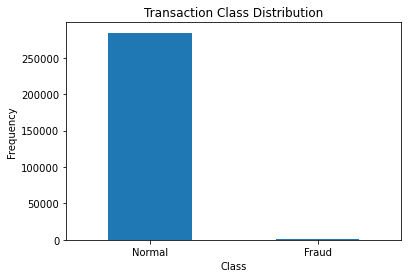

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The plot indicates that the dataset is highly imbalanced.

In [13]:
#Lets look at Time variable
df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [14]:
# Drop unnecessary columns.
df.drop(columns='Time', axis=1, inplace=True)

It could be that the Time variable is a misnomer here. It should have been serial no. as it does not capture the exact time the transaction was made but the time that is elapsed from offset. This can be dropped from the dataframe as it will not add any value in model building.

### Plotting the distribution of a variable

In [15]:
#Lets create a list of variables
var_list = list(df.columns)

In [16]:
# plot the histogram of a variable from the dataset to see the skewness
def plot_hist(var_list):
    for var in var_list:
        if ((var not in ('Amount','Class')) and (df[var].dtype==np.float64)):
            plt.hist(df[var])
            plt.show()

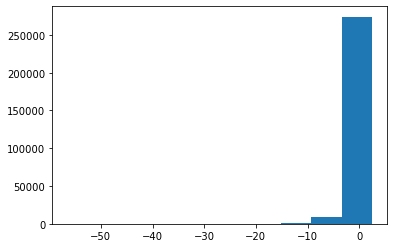

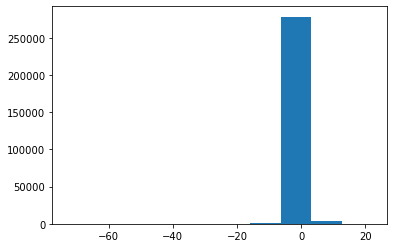

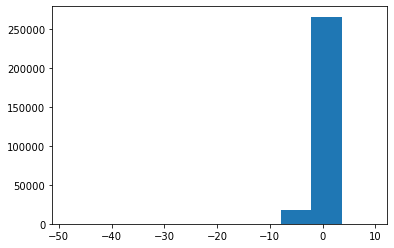

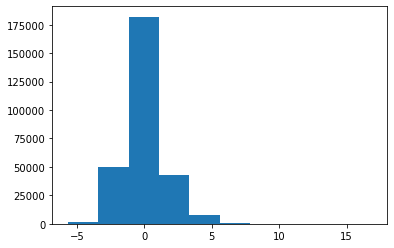

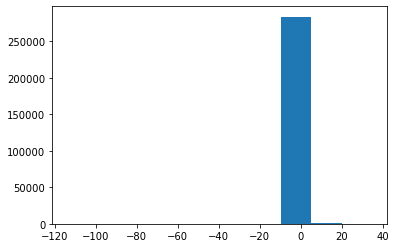

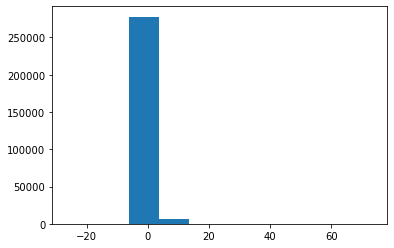

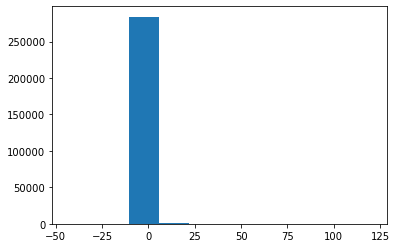

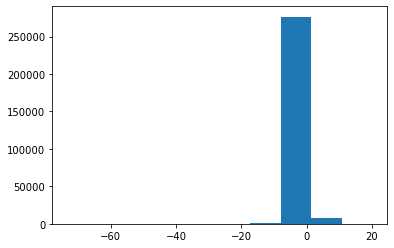

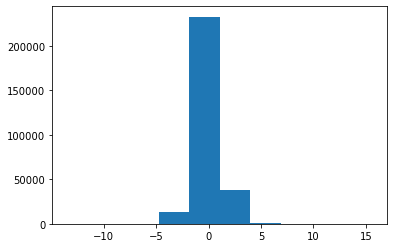

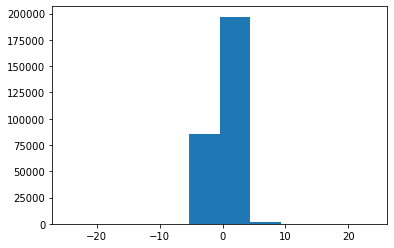

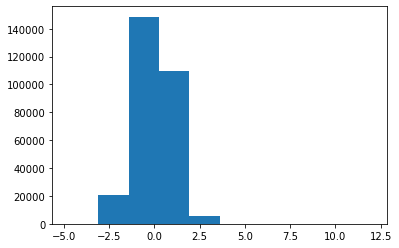

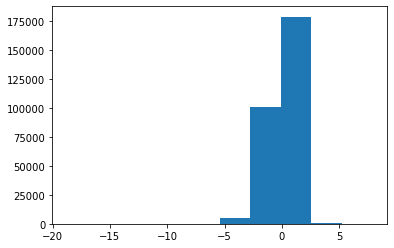

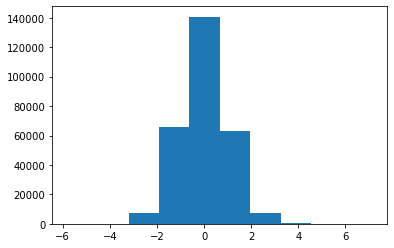

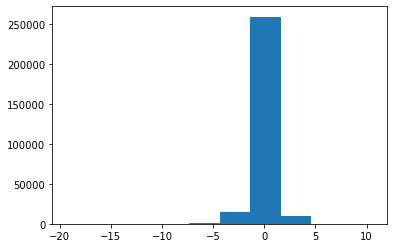

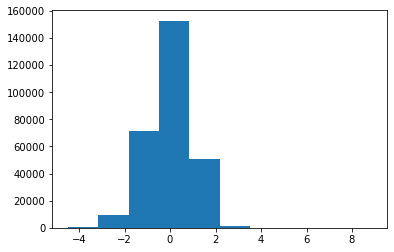

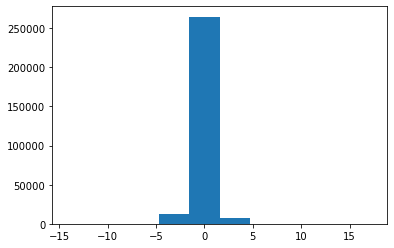

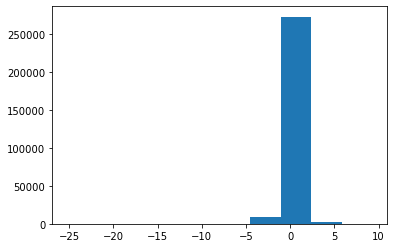

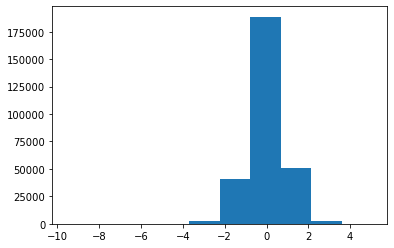

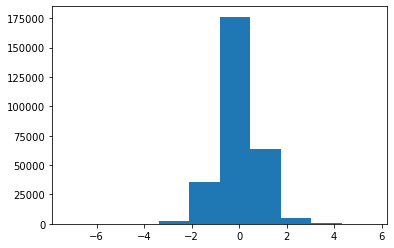

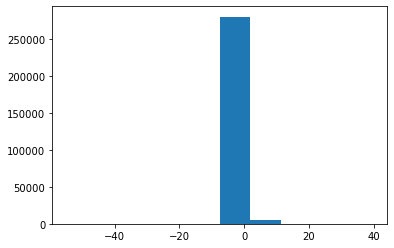

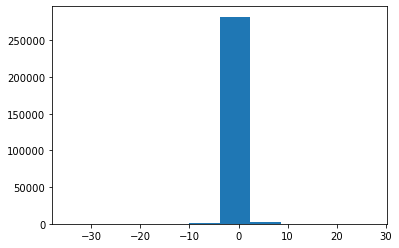

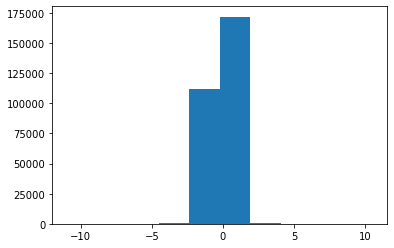

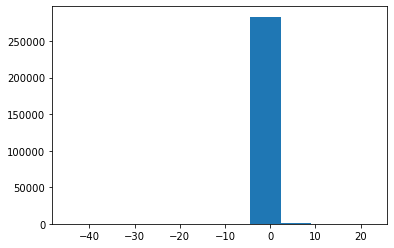

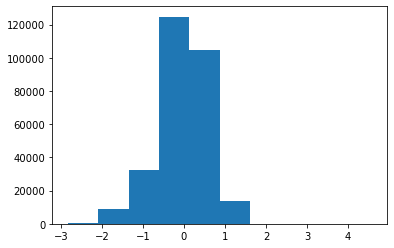

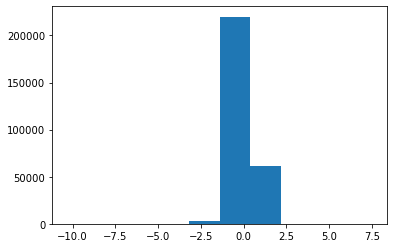

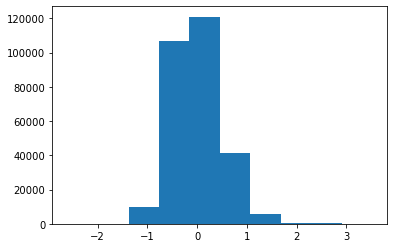

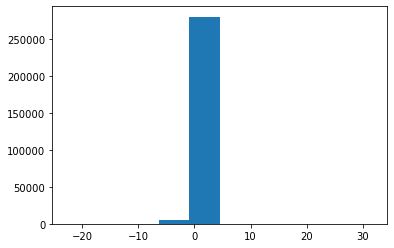

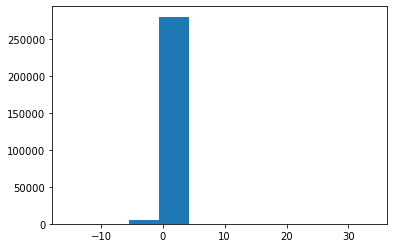

In [17]:
plot_hist(var_list)

The histograms and their probability distributions for each of the variables seem like Gaussians. If we consider each of the original variable as random variable before PCA and we are adding those random variables together and when we do so, the resultant random variable will always look like Gaussian.

### Splitting the data into train & test data

In [18]:
X = df.drop('is_fraud', axis=1)
y = df.is_fraud

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

##### Preserve X_test & y_test to evaluate on the test data once the model is trained

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
381
111


## Training the Model
- Train Logistic Regression on the imbalanced dataset and see the result

A note on Performance Metrics for Classification:

1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1 score
6. AUC-ROC score

Accuracy cannot be used here since the dataset is highly imbalanced and the results are always inclined towards the majority dataset.

Confusion Matrix, Precision, Recall and F1 score - all these metrics are dependent on threshold. If we change the threshold, then all these metrics will change and they cannot be used to measure the model performance here.

AUC-ROC score is the metric which is computed taking into account all the possible thresholds and are threshold independent. Higher the AUC-ROC score, better the classifier. Hence we will use AUC-ROC score as the metric for model performance.

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [22]:
# Perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [23]:
# print best hyperparameters
print("Best AUC: ", logreg_cv.best_score_)
print("Best hyperparameters: ", logreg_cv.best_params_)

Best AUC:  0.980789326503649
Best hyperparameters:  {'C': 0.001}


In [24]:
#Evaluate on train data
# predict on train data
y_train_pred = logreg_cv.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# check area under curve
y_train_pred_prob = logreg_cv.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[213195     29]
 [   176    205]]
AUC:    	 0.98


In [25]:
# predict on test data
y_pred = logreg_cv.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[71080    11]
 [   54    57]]
AUC:    	 0.99


In [26]:
#Lets store the above results
result = {"Model":["Logistic Regression on imbalanced data"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = pd.DataFrame(result)
result_df

,Model,ROC-AUC Score
0,Logistic Regression on imbalanced data,0.99


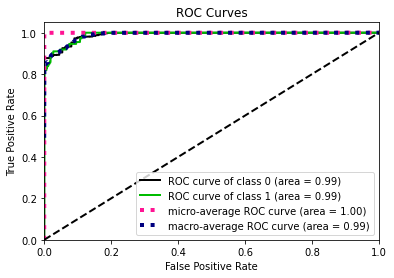

In [27]:
import scikitplot as skplt

predicted_probas = logreg_cv.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

## Training Model with balancing Classes

##### Perform class balancing with :
- Undersampling
- Oversampling
  - Uniform Oversampling
  - Random Oversampling
- SMOTE
- ADASYN

1. Undersampling:

Here the data points from majority class (non-fraud cases) are thrown away till it becomes equal to minority class (fraud cases). This is not advised as we lose lot of data from majority class. Data collection involves spending lot of resources and storing them. Hence Undersampling technique is not beneficial.

2. Oversampling:

Oversample the minority class till it becomes equal to majority class. There are two techiniques.

Uniform Oversampling
Random Oversampling
SMOTE
ADASYN

3. Uniform Oversampling:

In this case, each fraud data point which represent the minority class is copied over many times (this is determined by the ratio majority/minority). This is as good as stacking the same data points over and over on top of each other.

4. Random Oversampling:

In this case instead of copying over the data points uniformly, it will be done randomly.

Lets oversample the data and visualize them.

In [28]:
#Import the relevant package
from imblearn.over_sampling import RandomOverSampler

In [29]:
#Oversample the data
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #before oversampling
print(sorted(Counter(y_resampled).items())) #after oversampling

[(0, 213224), (1, 381)]
[(0, 213224), (1, 213224)]


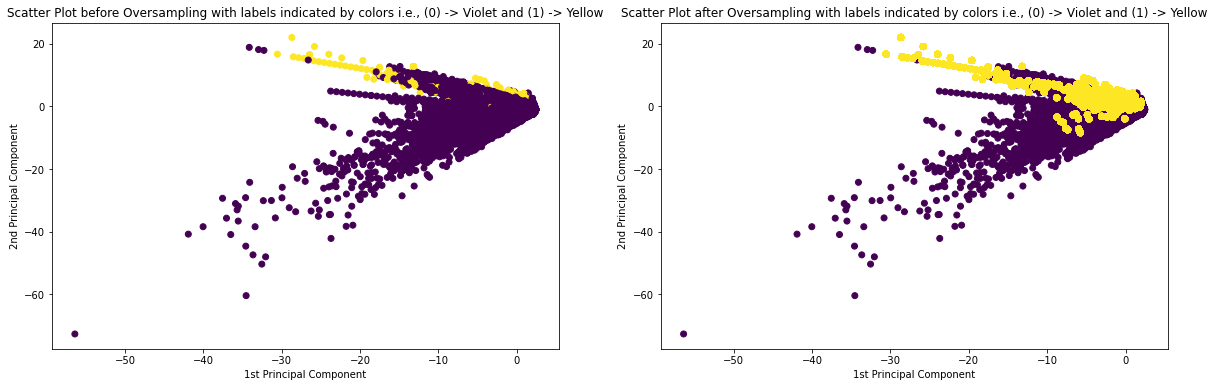

In [30]:
#Lets compare scatter plots before Oversampling and after Oversampling

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['F1'], X_train['F2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot before Oversampling with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_resampled['F1'], X_resampled['F2'], c = y_resampled)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot after Oversampling with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

### Observations:

#### We can clearly notice that doing oversampling (whether it is Uniform or Random) would not make any difference to the scatter plot and the pattern is not more prominent. It does not add any new information to the data. It merely repeats it. Hence Oversampling technique is not beneficial.

Lets look at other Oversampling techniques namely SMOTE and ADASYN

In [31]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
X_ada, y_ada = ADASYN().fit_resample(X_train, y_train)

In [32]:
#Lets look at the classes after balancing
print(sorted(Counter(y_smote).items()))
print(sorted(Counter(y_ada).items()))

[(0, 213224), (1, 213224)]
[(0, 213224), (1, 213239)]


Logistic Regression with SMOTE

In [33]:
# Perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv_smote = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model X_smote, y_smote 
logreg_cv_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [34]:
# print best hyperparameters
print("Best AUC: ", logreg_cv_smote.best_score_)
print("Best hyperparameters: ", logreg_cv_smote.best_params_)

Best AUC:  0.9921602264219503
Best hyperparameters:  {'C': 1}


In [35]:
#Evaluate on SMOTE data
# predict on SMOTE data
y_smote_pred = logreg_cv_smote.predict(X_smote)

# create confusion matrix
cm = confusion_matrix(y_smote, y_smote_pred)
print(cm)

# check area under curve
y_smote_pred_prob = logreg_cv_smote.predict_proba(X_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_smote, y_smote_pred_prob),2))

[[210019   3205]
 [ 12567 200657]]
AUC:    	 0.99


In [36]:
# predict on test data
y_pred = logreg_cv_smote.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv_smote.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[70062  1029]
 [   16    95]]
AUC:    	 0.98


In [37]:
#Lets store the above results
result = {"Model":["Logistic Regression with SMOTE"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression on imbalanced data,0.99
1,Logistic Regression with SMOTE,0.98


Logistic Regression with ADASYN

In [38]:
#perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv_ada = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model X_smote, y_smote 
logreg_cv_ada.fit(X_ada, y_ada)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [39]:
# print best hyperparameters
print("Best AUC: ", logreg_cv_ada.best_score_)
print("Best hyperparameters: ", logreg_cv_ada.best_params_)

Best AUC:  0.980737659560076
Best hyperparameters:  {'C': 4}


In [40]:
#Evaluate on ADASYN data
# predict on ADASYN data
y_ada_pred = logreg_cv_ada.predict(X_ada)

# create confusion matrix
cm = confusion_matrix(y_ada, y_ada_pred)
print(cm)

# check area under curve
y_ada_pred_prob = logreg_cv_ada.predict_proba(X_ada)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ada, y_ada_pred_prob),2))

[[204251   8973]
 [ 22673 190566]]
AUC:    	 0.98


In [41]:
# predict on test data
y_pred = logreg_cv_ada.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv_ada.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68172  2919]
 [    8   103]]
AUC:    	 0.98


In [42]:
#Lets store the above results
result = {"Model":["Logistic Regression with ADASYN"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression on imbalanced data,0.99
1,Logistic Regression with SMOTE,0.98
2,Logistic Regression with ADASYN,0.98


## **Conclusion:**

1. The results are consolidated as above. The 3 models namely, Logistic Regression on imbalanced data, Logistic Regression with SMOTE, and Logistic Regression with ADASYN were tested. Logistic Regression on imbalanced data gave the best results with ROC-AUC Score 0.99 on the test data.

2. Two Oversampling techniques namely, SMOTE and ADASYN were used to balance the dataset.

3. Logistic Regression model was run for both cases - SMOTE and ADASYN, with ROC-AUC Score of 0.98 on the test data. The score even though reduced a bit, it did not come down drastically. We can make a claim that balancing the dataset helps build better classifiers in this Credit Card Fraud Detection as a Classification Problem.

6. Printing the results of hyperparameters below for both Imbalanced and Balanced datasets.
  - Imbalanced data:

    1. Logistic Regression on imbalanced data:

        Best AUC:  0.980789326503649
        
        Best hyperparameters:  {'C': 0.001}

    2. Logistic Regression with SMOTE:

        Best AUC:  0.9921602264219503
        
        Best hyperparameters:  {'C': 1}

    3. Logistic Regression with ADASYN:

        Best AUC:  0.980737659560076

        Best hyperparameters:  {'C': 4}